<h1>Machine Learning and Statistics</h1>
<h2>Evaluation of Keras Timeseries Anomaly Detection Notebook </h2>
<h3>Conor McCaffrey, G00286552</h3>

https://keras.io/examples/timeseries/timeseries_anomaly_detection/

<h3> Table of Contents: </h3>

1. [Introduction](#introduction)
    * [Overview](#overview)
    * [What are TensorFlow and Keras?](#kt)
    * [The NAB Dataset](#nab)


2. [Load in our Dataset](#work)
    * [Loading Up](#load)
    * [Inspecting our 'no anomaly' Dataset](#noam)
    * [Inspecting our 'Anomaly' Dataset](#am)


3. [Preprocessing](#prep)
    * [Prepare our training data](#train)


4. [Neural Network](#nn)
    * [Building our Model](#buildmodel)
    * [Train our Model](#modeltrain)




5. [Evaluation of our Model](#eval)

    
6. [References](#ref)

***

In [1]:
# Numerical arrays.
import numpy as np

# Spreadsheet-like Data Frames.
import pandas as pd

# Neural networks aka machine learning/deep learning models and algorithms (See below for explanation of TensorFlow)
import tensorflow.keras as keras

# Plotting using matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

  <a name="introduction"></a>
<h1>Introduction</h1>

<a name="overview"></a>
<h3>Overview</h3>

This notebook will serve as a run through of the Keras Timeseries anomaly detection notebook [13]. We will explore the concepts detailed in the notebook and also provide some background information explaining the workflow. There will also be some additional work carried out to aid in our understanding of the notebook. 

<a name="kt"></a>
<h3>So, what are Tensorflow and Keras?</h3>   


Out of all our imported packages, Tensorflow and Keras stand out as we have not enoucntered them before in general use. Tensorflow is essentially a library containing a range of machine-learning/deep-learning models and algorithms that can be leveraged using programs such as Python [1]. TensorFlow 2.0, the most recent update, leverages the simplicity of Keras API to facilitate ease-of-use [1].  


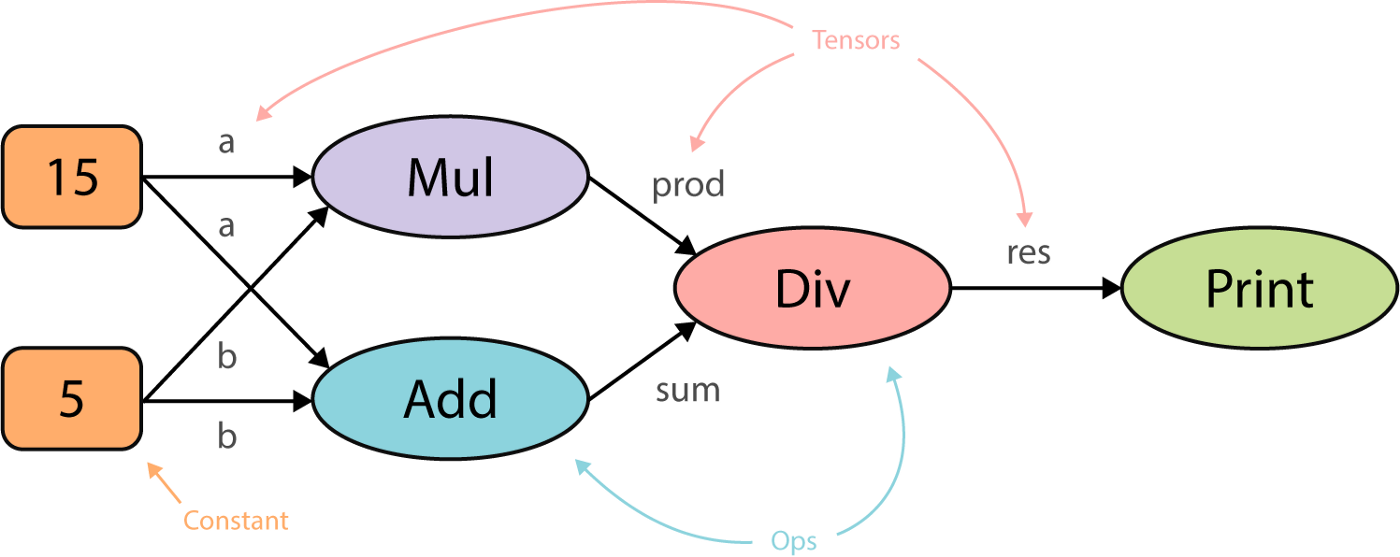
<center><b>Figure 1:</b> Overview of nodes in TensorFlow. Adapted from Reference 2</center>

The above diagram is known as a <b>computational graph</b>, basically a 'directed-flowchart' or graph, depicting computations in an operation. [2] This graph contains 'nodes' and edges, representing variables or operations [2]. Operations, just like in any program, can manipulate data (or variables) to whatever end the user wishes. The end result (or output) of one node is then used as the input to another node (or operation) to facilitate downstream processing.

Let's examine the above graph (Figure 1) a little closer. We have two constants, <i>a</i> and <i>b</i>. We perform a series of operations using these constants, first by multiplying them and adding them together. We then proceed to divide the product of these two operations and print the result. This series of operations is much easier to convey visually than by explaining through written procedures. 

Tradtionally, the complexity of major frameworks has been a hinderence to their use by users in machine learning [3]. Keras, constructed in Python, is a response to this complexity. Keras is basically designed to be simple, with the API “designed for human beings, not machines" [3]. Keras is supportewd by Google, Microsoft and Amazon, among others [3]. The idea is that Keras allows the user to easily define a neural network, and the TensorFlow enters the fray to build this defined neural network [4].  The 'Model' is the core Keras data structure [3]. There are two types of model in Keras: Sequential and Functional API [3]. Sequential lets you build a model in single layers, with single lines of code all that is needed for certain steps [3,4]. Functional API supports arbitrary model architectures (in contrast to Sequential which is limited to single-input, single-output layers) permitting multi-input/output models, is more flexible but naturally much more complex (Figure 2) [3-5].

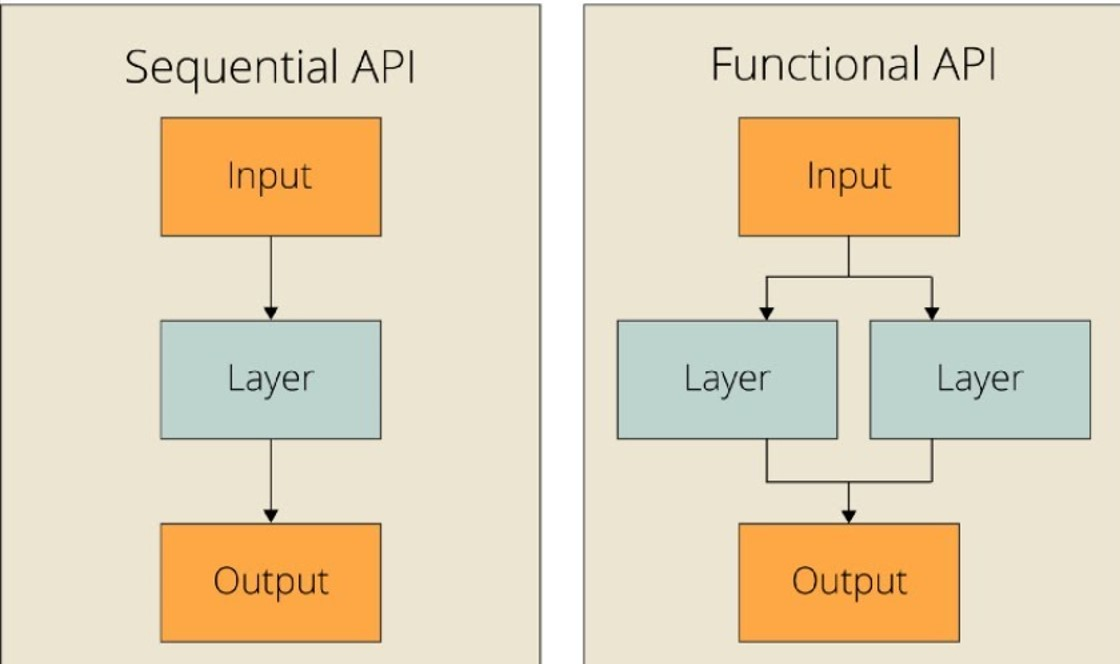
<center><b>Figure 2:</b> APIs in Keras. Adapted from Reference 5</center>

<a name="nab"></a>
<h3>The NAB Dataset</h3> 

https://www.kaggle.com/datasets/boltzmannbrain/nab

https://github.com/numenta/NAB

The Numenta Anomaly Benchmark (NAB) is an open-source set of data files that can be used by different anomaly detection algorithms to determine their effectiveness [6]. The dataset was made available in 2015, and is composed of 58 labeled timeseries data files [7]. The data is retrieved from real-world sources such as Amazon Web Services (AWS), Twitter, New York traffic data and other sources [6-8]. The NAB dataset also contains a scoring mechanism to allow easy comparison between detection algorithms [6]. Anomaly detection has applications in real-world scenarios such as fraud detection, tumour detection in medical imaging and even errors in written text [9].

 <a name="work"></a>
<h1>Load in Our Datasets</h1>

<a name="load"></a>
<h3>Loading Up</h3>  

Let's begin by loading in and inspecting our datasets. 

In [2]:
# Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

In [3]:
# let's confirm the URL of our 'no anomaly' dataset
no_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_small_noise.csv'

In [4]:
# let's confirm the URL of our 'anomaly' dataset
with_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/art_daily_jumpsup.csv'

In [5]:
# Let's read in our dataset using pandas csv function
# parse_dates is used for inferring timestamps, converting it to datetime types
# if we dont use parse_dates, data will be read in as a string [10]

# set the 'timestamp' column as the index

df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

In [6]:
# Let's read in our dataset using pandas csv function
# parse_dates is used for inferring timestamps, converting it to datetime types
# if we dont use parse_dates, data will be read in as a string [10]

# set the 'timestamp' column as the index
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

<a name="noam"></a>
<h3>Inspecting our 'no anomaly' Dataset</h3>

In [7]:
# Let's print the first 5 rows of our dataset
df_small_noise.head()

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


In [8]:
# Let's print the last 5 rows of our dataset
df_small_noise.tail()

,value
timestamp,
2014-04-14 23:35:00,20.211195
2014-04-14 23:40:00,20.531041
2014-04-14 23:45:00,19.032127
2014-04-14 23:50:00,21.798801
2014-04-14 23:55:00,18.682620


In [9]:
# Let's have a glance at the makeup of our dataset
df_small_noise.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4032 entries, 2014-04-01 00:00:00 to 2014-04-14 23:55:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   4032 non-null   float64
dtypes: float64(1)
memory usage: 63.0 KB


In [10]:
# To check null values row-wise
df_small_noise.isnull().sum()

value    0
dtype: int64

So we can see we have one column (outside of the index), and that we have no NULL values and all values are of type float. What is interesting is that we now know our dataset covers a 2-week period as shown in the 'DatetimeIndex' row.

In [11]:
# Let's look at the essentials of our dataset
df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


So our minimum value is 18.000964 and our maximum value is 87.976128 with the average value being 42.438353. 

In [12]:
# Let's pick a random value for some error-checking
df_small_noise.iloc[0]

value    18.324919
Name: 2014-04-01 00:00:00, dtype: float64

In [13]:
# Example of taking just the value and no extra info
df_small_noise.iloc[0]['value']

18.3249185392

In [14]:
# Same as above, just another way to perform the operation 
df_small_noise.iloc[0].values[0]

18.3249185392

In [15]:
# Let's pick a random value for some error-checking (final value)
df_small_noise.iloc[-1]

value    18.68262
Name: 2014-04-14 23:55:00, dtype: float64

An interesting observation here is that the value printed above has 5 figures after the decimal place whereas the result from calling the tail() function above has six figures after the decimal point. Let's investigate. 

In [16]:
# Lets isolate and print the final value to compare with previous results
df_small_noise.iloc[-1].values[-1]

18.6826203655

That's interesting, both the tail() and iloc[] methods have truncated our values. In the sector I work in, this brings in the possibility of 'double-rounding', which is against best practice and can lead to errors in reporting data. This is good to know in advance. 

In [17]:
# Lets look at the shape of our dataset
df_small_noise.shape

(4032, 1)

As expected, we have one column (outside of the index) and 4032 rows in our dataset. 

Let's go ahead and plot this data to have a look. Remember, this dataset should not have any anomalies so should be consistent across the board. 

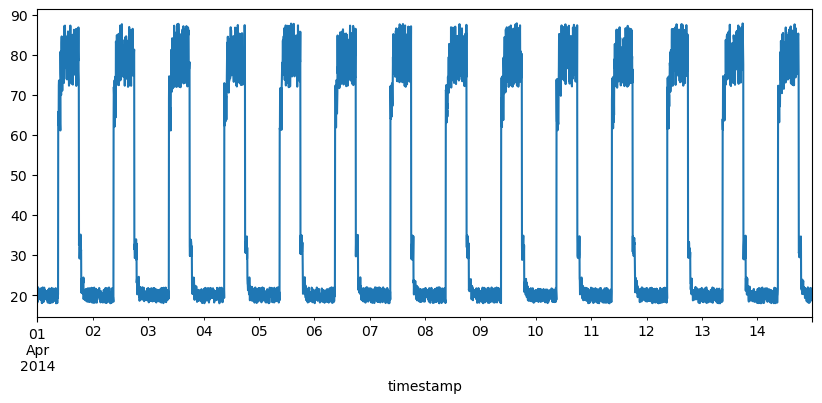

In [18]:
# plotting using matplotlib and seaborn

fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_small_noise.plot(legend=False, ax=ax);


In [19]:
# Lets split our data into two groups and plot using Seaborn
dffirstHalf = df_small_noise[:2016]
dffirstHalf

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120
...,...
2014-04-07 23:35:00,18.647021
2014-04-07 23:40:00,20.805385
2014-04-07 23:45:00,21.039511


In [20]:
# Lets split our data into two groups and plot using Seaborn
dfsecondHalf = df_small_noise[2016:]
dfsecondHalf

,value
timestamp,
2014-04-08 00:00:00,21.258500
2014-04-08 00:05:00,21.744652
2014-04-08 00:10:00,20.054071
2014-04-08 00:15:00,21.801117
2014-04-08 00:20:00,20.142756
...,...
2014-04-14 23:35:00,20.211195
2014-04-14 23:40:00,20.531041
2014-04-14 23:45:00,19.032127


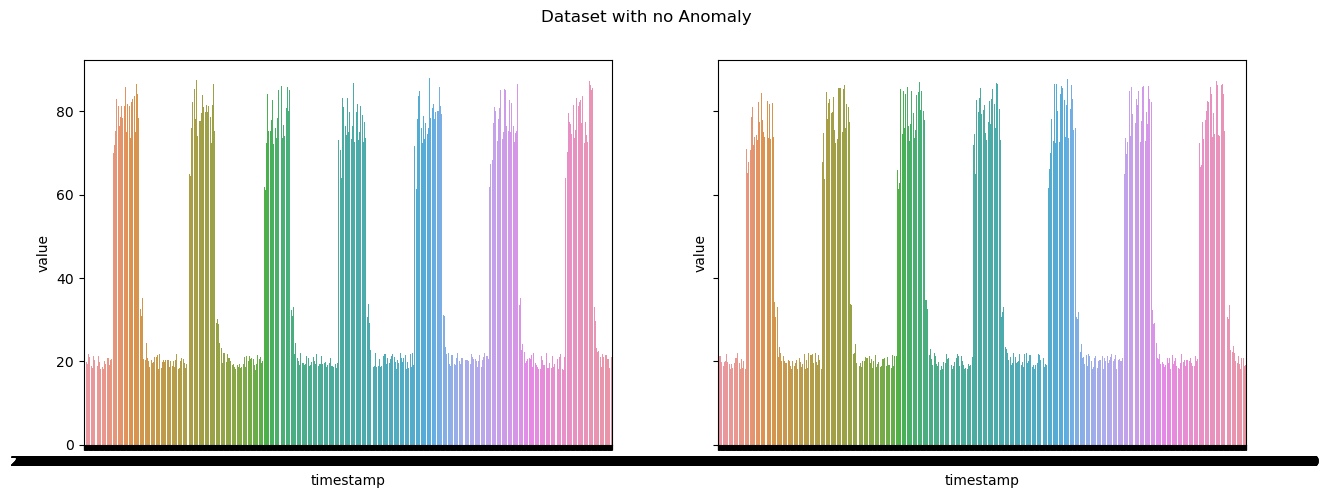

In [21]:
# Lets plot this using Seaborn (Reference 11)
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Dataset with no Anomaly')

# dffirstHalf
sns.barplot(ax=axes[0], x=dffirstHalf.index, y=dffirstHalf.value);

# dfsecondHalf
sns.barplot(ax=axes[1], x=dfsecondHalf.index, y=dfsecondHalf.value);


<a name="am"></a>
<h3>Inspecting our 'Anomaly' Dataset</h3>

In [22]:
# Let's print the first 5 rows of our dataset
df_daily_jumpsup.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


In [23]:
# Let's print the final 5 rows of our dataset
df_daily_jumpsup.tail()

,value
timestamp,
2014-04-14 23:35:00,18.074649
2014-04-14 23:40:00,21.002014
2014-04-14 23:45:00,20.566713
2014-04-14 23:50:00,18.254193
2014-04-14 23:55:00,21.863147


In [24]:
# Let's have a glance at the makeup of our dataset
df_daily_jumpsup.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4032 entries, 2014-04-01 00:00:00 to 2014-04-14 23:55:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   4032 non-null   float64
dtypes: float64(1)
memory usage: 63.0 KB


In [25]:
# To check null values row-wise
df_daily_jumpsup.isnull().sum()

value    0
dtype: int64

So we can see we have one column (outside of the index), and that we have no NULL values and all values are of type float. What is interesting is that we now know our dataset covers a 2-week period as shown in the 'DatetimeIndex' row.

In [26]:
# Lets look at the essentials of our dataset
df_daily_jumpsup.describe()

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


We can see we have 4032 vlaues, similar to our 'no anomaly' dataset. Our minimum value is 18.001010 and our maximum value is 164.947481. Our average value is 44.494254. 

In [27]:
# Let's inspect our first value
df_daily_jumpsup.iloc[0]['value']

19.761251903

Once again we can see how our full value has been truncated. When using the head() function above, we have 6 figures after the decimal point whereas here we have 9. 

In [28]:
# Lets look at the shape of our data
df_daily_jumpsup.shape

(4032, 1)

As expected, we have a similar shape to our 'no anomaly' dataset. 

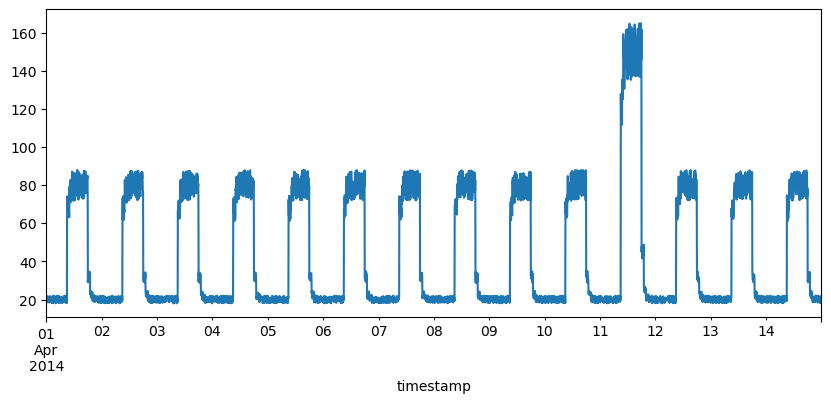

In [29]:
# Now let's plot our dataset that contains the anomaly
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_daily_jumpsup.plot(legend=False, ax=ax);

We can immediately see our anomaly here, this was also obvious when we called the describe() method as the maximum value was so much greater than the average value. 

  <a name="prep"></a>
<h1> Preprocessing </h1>

***

This section essentially prepares our data for insertion into a neural network. We will get some descriptive statistics such as the mean, standard deviation and prepare our windows. Standardisation is an important step in preprocessing data - transforming values so that the mean is close to zero and the standard deviation is one [14]. This is perhaps slightly less important for this dataset but other examples could include columns that work off completely different scales, such as a Age (which may be in years) and Height (which could be in cm). A model may give higher 'weight' to the Height category due to the higher values. To avoide this possibility, we perform standardisation [14]. 

In [30]:
# Let's get the mean of our 'no anomaly' data
train_mean = df_small_noise.mean()

train_mean

value    42.438353
dtype: float64

This is the same as we got above - a good sign.

In [31]:
# Let's get the standard deviation of our 'no anomaly' data
train_std = df_small_noise.std()

train_std

value    28.077122
dtype: float64

This is also the same as we got above - a good sign.

In [32]:
# Let's normalise our values between -0.8 and 1.62 and center on 0. 
# this is more important in datasets with a wide range of values
df_train_vals = (df_small_noise - train_mean) / train_std

In [33]:
# Print the first 5 rows of our training values
df_train_vals.head()

,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


In [34]:
# Lets have a closer look at our training values
df_train_vals.describe()

,value
count,4.032000e+03
mean,-2.616541e-15
std,1.000000e+00
min,-8.703666e-01
25%,-8.048176e-01
50%,-7.418804e-01
75%,1.175759e+00
max,1.621882e+00


We can see our maximum value is 1.621882 and our minimum value is -0.8703666. Again, our variance is standardised at one.  

<a name="train"></a>
<h3>Prepare our training data</h3>

Here we are preparing our training data and plotting so we gain a better understanding. 

In [35]:
# lets subtract the mean from each of the values and divide by the standard deviation. 
# this is part of the process of standardisation where the variable is centered at zero 
# and standardising the variance at one [12]

# making a new column here
df_small_noise['less_mean'] = df_small_noise['value'] - df_small_noise['value'].mean()
# making a new column here
df_small_noise['div_std'] = df_small_noise['less_mean'] / df_small_noise['value'].std()

In [36]:
# lets inspect our data
df_small_noise.describe()

,value,less_mean,div_std
count,4032.000000,4.032000e+03,4.032000e+03
mean,42.438353,-7.342627e-14,-2.616541e-15
std,28.077122,2.807712e+01,1.000000e+00
min,18.000964,-2.443739e+01,-8.703666e-01
25%,19.841390,-2.259696e+01,-8.048176e-01
50%,21.608487,-2.082987e+01,-7.418804e-01
75%,75.450282,3.301193e+01,1.175759e+00
max,87.976128,4.553777e+01,1.621882e+00


In [37]:
df_small_noise['value'].mean(), df_small_noise['less_mean'].mean(), df_small_noise['div_std'].mean()

(42.438353335806646, -7.342627387941552e-14, -2.616541242931684e-15)

In [38]:
df_small_noise['value'].std(), df_small_noise['less_mean'].std(), df_small_noise['div_std'].std()

(28.077122281262515, 28.077122281262508, 1.0000000000000018)

Unsurprisingly, our standard deviation here is 1. This was always the plan. 

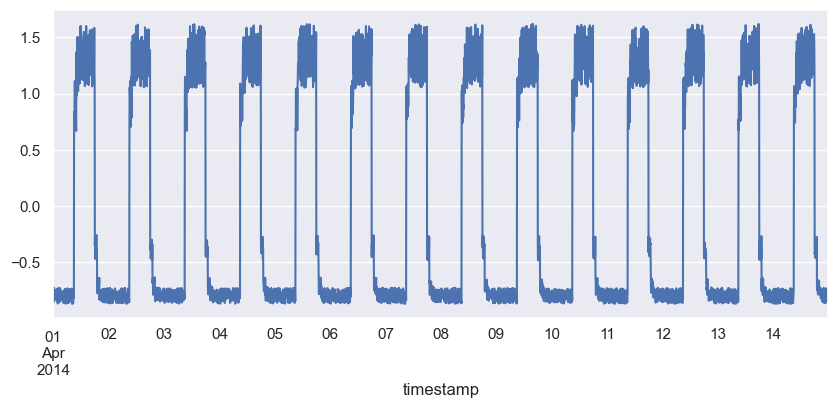

In [39]:
# lets plot df_train_vals
# this will be a plot of our standardised values
sns.set() # lets use seaborn for the fun of it 
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax);

As these values have been normalised, the spread appears to be much smaller. We can revert back to the previous plot of this set and observe the spread being between 20-90. Here, we are spread between -0.8 - 1.6. This makes the graph much more visually accessible. 

In [40]:
# Lets look at the shape of our training values, which have been centered on zero. 
df_train_vals.shape

(4032, 1)

In [41]:
# defining our window size which will traverse our 4032 values in df_train_vals
window_size = 288

Window example:

```python
[1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
window_size = 3
[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
...
```

In [42]:
# Window list example.
L = [1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
# Example window size.
win_size = 3
# Length of L.
len(L)

12

In [43]:
# Number of windows from L.
# i.e who gets to be the first element in a window
len(L) - (win_size - 1)

10

In [44]:
# Remove brackets.
# this is basically an explanation of the below loop
len(L) - win_size + 1

10

In [45]:
# Print the windows.
# this is basically an explanation of the below loop

for i in range(len(L) - win_size + 1):
    print(L[i:i + win_size])

[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
[5, 6, 7]
[6, 7, 1]
[7, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]


In [46]:
# For accumulating the windows.
wins = []

# Generate the windows
# for i in range up to but not including 10 as explained above
for i in range(len(L) - win_size + 1):
    wins.append(L[i:i + win_size])
# print out wins to verify
wins

[[1, 1, 2],
 [1, 2, 4],
 [2, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 1],
 [7, 1, 2],
 [1, 2, 3],
 [2, 3, 4],
 [3, 4, 5]]

In [47]:
# Create a 2D numpy array from wins.
np.stack(wins)

array([[1, 1, 2],
       [1, 2, 4],
       [2, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 1],
       [7, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

In [48]:
# L is an empty list
# np.stack() quite simply stacks values on top of one another
def windows(vals, N=window_size):
  # lets define an empty list
  L = []
  # lets loop through each window in our set
  for i in range(len(vals) - N + 1):
    # append each window to our previously declared list
    L.append(vals[i:i+N])
  # Stack all windows in our list
  return np.stack(L)

In [49]:
# create our windows from df_train_vals and assign to x_train
x_train = windows(df_train_vals)

In [50]:
# printing the first and final value so we can error check from our original df_train_vals set.
# hoping this is the same as the values we will get below in our vals set. 
x_train[0][0], x_train[-1][-1]

(array([-0.85882857]), array([-0.8460886]))

In [51]:
# now to print original values to ensure our windows were constructed correctly. 
df_train_vals.iloc[0], df_train_vals.iloc[-1]

(value   -0.858829
 Name: 2014-04-01 00:00:00, dtype: float64,
 value   -0.846089
 Name: 2014-04-14 23:55:00, dtype: float64)

It's important to recognise the rounding that is occurring again. 

In [52]:
# looking at the makeup of our training set
x_train.shape

(3745, 288, 1)

We can see from this we have 3745 windows of size 288.

In [53]:
# lets print the range of our values in df_train_vals. 
df_train_vals['value'].values

array([-0.85882857, -0.72899302, -0.84814772, ..., -0.83364049,
       -0.73510213, -0.8460886 ])

In [54]:
# let's print the values in our first window
x_train[0].flatten()

array([-0.85882857, -0.72899302, -0.84814772, -0.72958579, -0.731173  ,
       -0.75730984, -0.77645641, -0.7880838 , -0.747012  , -0.829166  ,
       -0.80377285, -0.7821597 , -0.81182078, -0.80949918, -0.82334701,
       -0.79001779, -0.74922405, -0.84169024, -0.73727717, -0.77223023,
       -0.75311352, -0.79116337, -0.75934728, -0.86809294, -0.75381057,
       -0.86468256, -0.74361965, -0.72908121, -0.82850668, -0.84043795,
       -0.76136364, -0.8343536 , -0.74708881, -0.85574949, -0.85245676,
       -0.73090636, -0.77440264, -0.74974936, -0.82419543, -0.77402585,
       -0.78574242, -0.7844733 , -0.77316412, -0.78843253, -0.80927467,
       -0.83109167, -0.76090519, -0.83816509, -0.77176485, -0.83715923,
       -0.78131343, -0.76396862, -0.83924191, -0.86186112, -0.85174179,
       -0.78406773, -0.74938477, -0.86399047, -0.76581026, -0.82177506,
       -0.80222751, -0.73807119, -0.82310669, -0.80410682, -0.86845167,
       -0.85877599, -0.83356075, -0.86643297, -0.78045221, -0.80

It's interesting to note the differing significant figures in each of our outputs. 

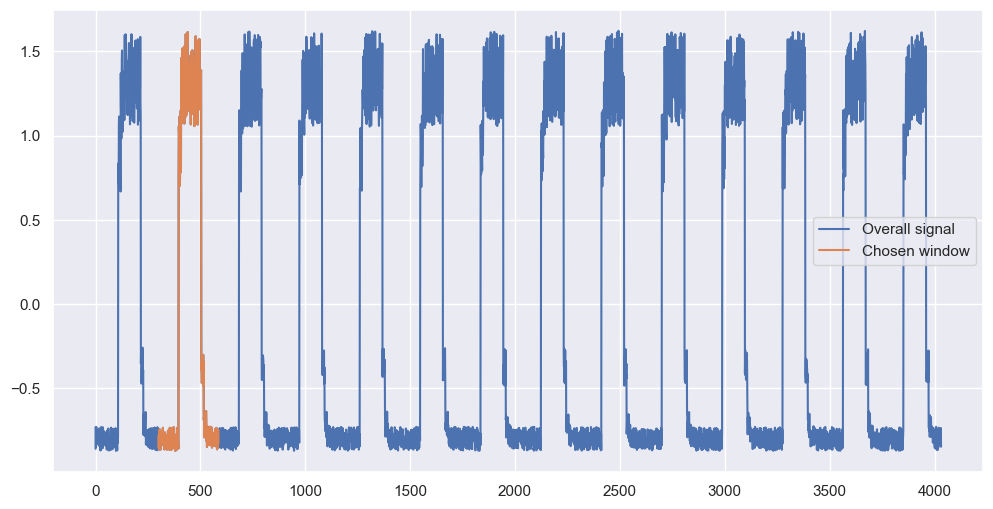

In [55]:
# re-creating plot from above for df_train_vals
# plotting window 299
window_no = 299

# 
fig, ax = plt.subplots(figsize=(12, 6))

#  y-values retrieved from df_train_vals value column
y = df_train_vals['value'].values

# generate x-values spaced out similar to y-values
ax.plot(np.arange(y.shape[0]), y, label='Overall signal')

# The first window.
# flatten will get rid of inner arrays
w = x_train[window_no].flatten()

# plotting the variable w in orange on top of full set
ax.plot(np.arange(w.shape[0]) + window_no, w, label='Chosen window')

ax.legend();

<a name="nn"></a>

<h1> Neural Network</h1>

***

<a name="buildmodel"></a>
<h3>Building our Model</h3>

Let's begin to build our model that we will use. 

In [56]:
# look at our data
# x_train.shape[0] = 3745
# x_train.shape[1] = 288
# x_train.shape[2] = 1
x_train.shape

(3745, 288, 1)

I believe the below step justifies some explanation, especially to those who are new to machine learning. A 'convolutional reconstruction autoencoder model' requires some breakdown into plain English. An autoencoder is a neural network that uses reconstruction error to simply detect anomalies. The 'reconstruction error' is the divergence between input data and reconstructed data [15]. A 'convolutional' neural network is primarily used for image processing, however it can also be used for data analysis in where the input is multiplied by a set of weights [16, 17]. 

* A layer is the basic building block of a neural network [4].
* A kernal is a matrix of learnable parameters [19]. The kernal size specifies the length of the convolutional window [22]. 
* Activation is describing the activation map/ function, in our case 'relu' [19]. Rectified Linear Unit (ReLU) is the most commonly incorporated activation function in deep learning [20]. Activation functions are used to determine the output of a neural network [21]. 
* The sliding size of the kernal is known as the stride, set to 2 in our case [19].
* Filters is the dimension of the output [22].
* Padding of 'same' is case-insensitive [22]. This basically means we will have 'zeros' padded evenly left/right and up/down of the input, ensuring the output is the same as the input [23].
* A dropout layer is used for regularisation [24]. This is intended to slow down the learning process and ensure an overall beterr final model [24]. 
* Transpose is used for deconvulution [25]. 

In [86]:
#let's construct out convolutional reconstruction autoencode model
layers = [
  # all of the values of the window are going in as input into neural network
  keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
  # Convolutional Layer
  keras.layers.Conv1D(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  # Dropout Layer
  keras.layers.Dropout(rate=0.2),
  #Convolutional Layer
  keras.layers.Conv1D(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  # Used for deconvulation
  keras.layers.Conv1DTranspose(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  # Slowing down our learning for a better final model
  keras.layers.Dropout(rate=0.2),
  # Used for deconvulation
  keras.layers.Conv1DTranspose(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  # Used for deconvulation 
  keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]

In [87]:
# Build our model now with the defined inputs from above
model = keras.Sequential(layers)

An optimiser (alongside 'loss' ) is one of the two arguments required for compiling a Keras model [26]. The Adam optimiser is convenient as it has minimal memory requirement and is suited for when working with large datasets [27]. The Adam optimiser is defined in literature as a 'stochastic gradient descent method', what this means in plain English is that it is used to find model parameters that are the best fit between predicted and actual outputs [28]. Parameters are updated iteratively in order to reduce the cost function, a term we have came across previously in our notes [29]. The learning rate is an important parameter. Too high a value and we may miss the optimal value whereas too low and the algorithm will take a very long time to run [29]. 

In [88]:
# We will use the Adam optimiser, the learning rate is set to the default value of 0.001
optimizer = keras.optimizers.Adam(learning_rate=0.001)

The loss function is the error function, used to estimate the error for the current state of the model [30]. This is a method of evaluating how good our algorithm is performing modeling on our dataset i.e., how effeicient it is at predicting the outcome [31]. Here, we are using 'mean square error' (mse), the most commonly used regression loss function in where the average of squared differences between actual and predicted values [31]. 

In [60]:
# Compile the Neural Network
model.compile(optimizer=optimizer, loss="mse")

In [61]:
# this will return a summary of our layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

So we can see we have 9505 different parameters. 

<a name="modeltrain"></a>
<h3>Train our Model</h3>

Before training our model, let's again explain some of the below concepts. Incorporating Keras callback and early stopping basically means we do not need to manually input the number of epochs we use (one 'epoch' is a single pass over the training dataset)  [4, 18]. We have set a variable called 'Patience' to 5, this essentially means that if our validation loss sees no marked improvement (decrease) after 5 consecutive epochs, we are going to halt the training process [18]. The greater the number of epochs, the greater the accuracy so we have set this to 50 [18]. Our 'validation_split' is set to 0.1, meaning that 10% of our input data is being segregated for validation purposes [18]. The 'batch-size' is the amount of datapoints the model will use to update the weights [15].

In [62]:
# Keras fit() method lets us train the model for a defined number of epochs
# history is the fitted model 
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 3s 67ms/step - loss: 0.5039 - val_loss: 0.0663
Epoch 2/50
27/27 [==============================] - 1s 43ms/step - loss: 0.0745 - val_loss: 0.0376
Epoch 3/50
27/27 [==============================] - 1s 45ms/step - loss: 0.0537 - val_loss: 0.0329
Epoch 4/50
27/27 [==============================] - 1s 47ms/step - loss: 0.0454 - val_loss: 0.0283
Epoch 5/50
27/27 [==============================] - 1s 46ms/step - loss: 0.0398 - val_loss: 0.0256
Epoch 6/50
27/27 [==============================] - 1s 46ms/step - loss: 0.0358 - val_loss: 0.0236
Epoch 7/50
27/27 [==============================] - 1s 43ms/step - loss: 0.0327 - val_loss: 0.0227
Epoch 8/50
27/27 [==============================] - 1s 43ms/step - loss: 0.0304 - val_loss: 0.0217
Epoch 9/50
27/27 [==============================] - 1s 48ms/step - loss: 0.0283 - val_loss: 0.0207
Epoch 10/50
27/27 [==============================] - 1s 43ms/step - loss: 0.0266 - val_loss: 0.0209
Epoch 11/

<a name="eval"></a>

<h1> Evaluation of our Model</h1>

***

In [63]:
# history.history is a record of training loss values and metrics values at successive epochs []
history.history["loss"]

[0.5039150714874268,
 0.07445324212312698,
 0.0537058562040329,
 0.04544422775506973,
 0.03980778902769089,
 0.0357828214764595,
 0.03273993358016014,
 0.030398301780223846,
 0.028274597600102425,
 0.026578761637210846,
 0.025098208338022232,
 0.023734545335173607,
 0.022572660818696022,
 0.021340390667319298,
 0.020344611257314682,
 0.019337676465511322,
 0.018407359719276428]

In [64]:
history.history["val_loss"]

[0.0662718117237091,
 0.03763861209154129,
 0.03293105214834213,
 0.02832625061273575,
 0.025593943893909454,
 0.023598531261086464,
 0.022720644250512123,
 0.021698396652936935,
 0.02071208879351616,
 0.020907728001475334,
 0.02043815888464451,
 0.02023872174322605,
 0.021619847044348717,
 0.021891560405492783,
 0.02314472384750843,
 0.021175354719161987,
 0.023898202925920486]

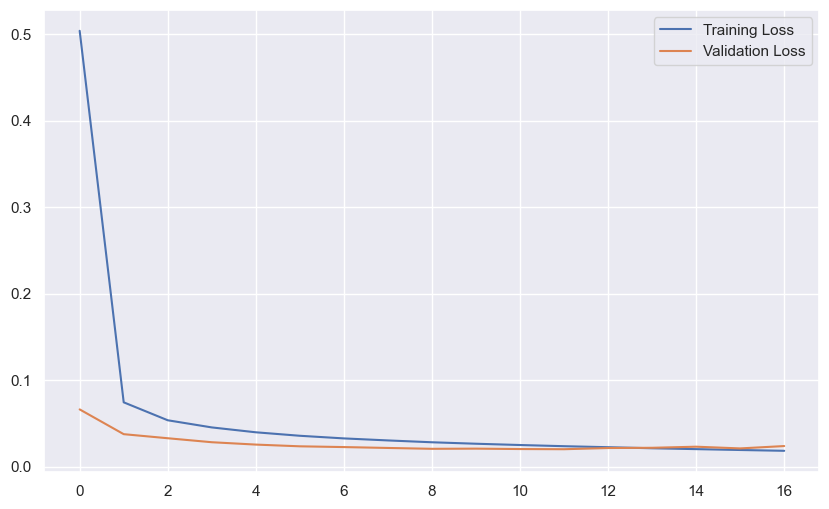

In [65]:
# Plotting as we did earlier 
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.plot(history.history["loss"], label="Training Loss")
# 
ax.plot(history.history["val_loss"], label="Validation Loss")
# show the legend
ax.legend();

In [66]:
# Get train MAE loss.
# Mean Absolute Error - get the model they have trained to predict the values out of the training set. 
x_train_pred = model.predict(x_train)

118/118 [==============================] - 1s 6ms/step


In [67]:
# Calculate loss...
# determination of accuracy. Take the absolute value of prediction from expected value 
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

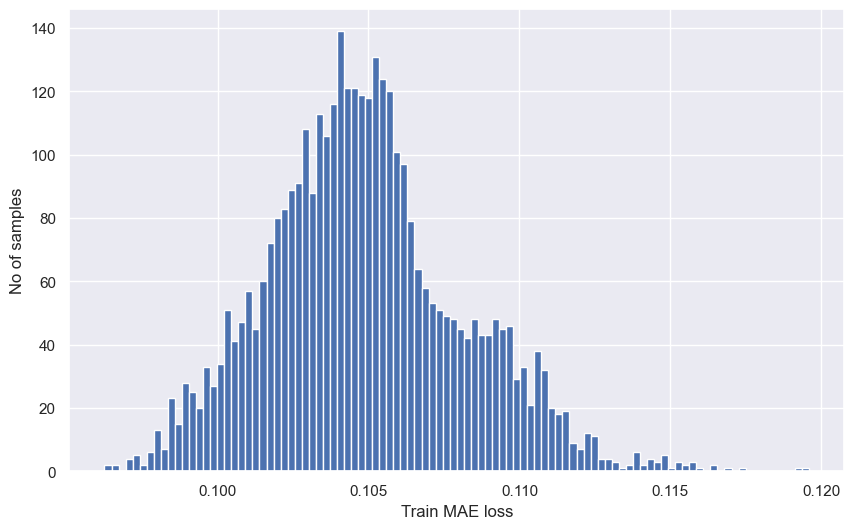

In [68]:
# plot the above value
fig, ax = plt.subplots(figsize=(10, 6))
# plotting a histogram now with 100 bars
ax.hist(train_mae_loss, bins=100)
# setting labels
ax.set_xlabel("Train MAE loss")
# setting lebels
ax.set_ylabel("No of samples");

Set up a threshold for outliers/anomalies by comparing the differences between the autoencoder model reconstruction value and the actual value [15].

In [69]:
# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)

# print out the threshold
threshold

0.11959143753553955

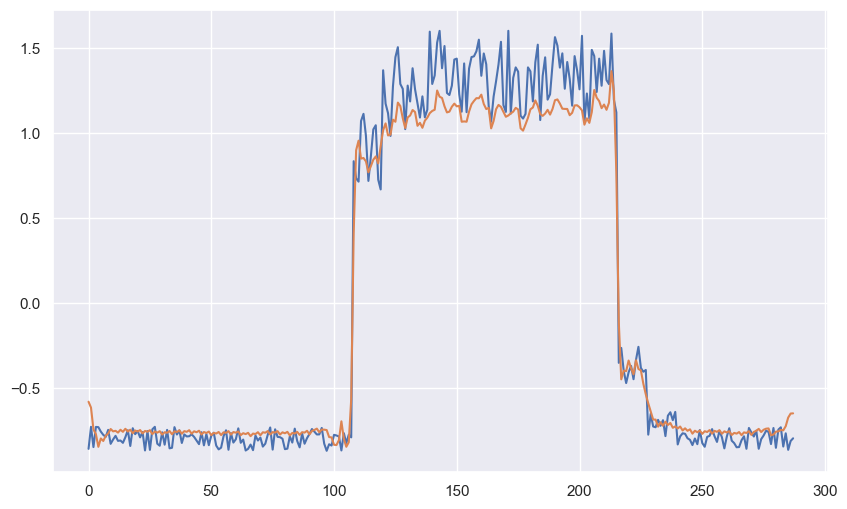

In [70]:
# plotting out our training values and predicted values
fig, ax = plt.subplots(figsize=(10, 6))

# first window
ax.plot(x_train[0])

# first window
ax.plot(x_train_pred[0]);

In [71]:
# subtracting training mean from training standard deviation
# anything we do to training set we replicate on test set. 
df_test_value = (df_daily_jumpsup - train_mean) / train_std

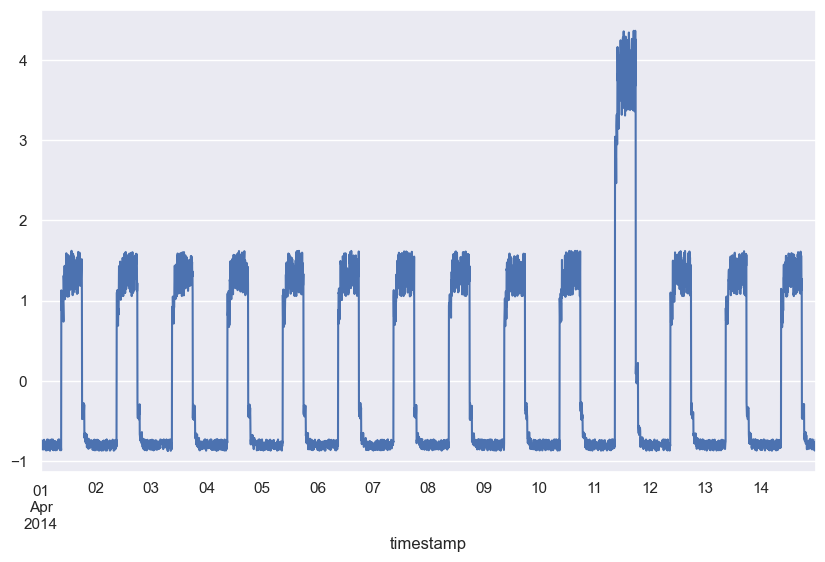

In [72]:
# let's plot the above result now 
fig, ax = plt.subplots(figsize=(10, 6))

# no legend needed here
df_test_value.plot(legend=False, ax=ax);

In [73]:
# Create sequences from test values.
# creating our windows again but now for the test values, not the training values
x_test = windows(df_test_value.values)
# looking at the shape of our data. This should be the same as the training set as above
x_test.shape

(3745, 288, 1)

In [74]:
# 
x_test_pred = model.predict(x_test)

118/118 [==============================] - 1s 7ms/step


In [75]:
# testing maximum absolute error loss here
# 
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
# print the result
test_mae_loss

array([[0.10386321],
       [0.10296873],
       [0.10595578],
       ...,
       [0.10584546],
       [0.10425651],
       [0.1065505 ]])

In [76]:
# lets reshape our values into a row
test_mae_loss = test_mae_loss.reshape((-1))
# print the values
test_mae_loss

array([0.10386321, 0.10296873, 0.10595578, ..., 0.10584546, 0.10425651,
       0.1065505 ])

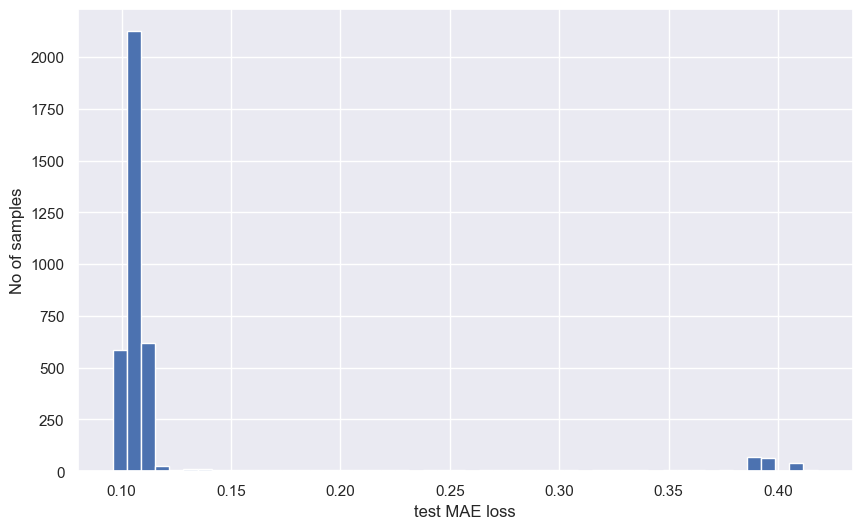

In [77]:
# lets plot the above values
fig, ax = plt.subplots(figsize=(10, 6))

# plotting a histogram with test_mae_loss with 50 bars
ax.hist(test_mae_loss, bins=50)

# setting labels
ax.set_xlabel("test MAE loss")

# setting labels
ax.set_ylabel("No of samples");

In [78]:
# Detect all the samples which are anomalies.
# this is a Boolean array
# checking for wheretest_mae_loss is greater than the threshold
anomalies = test_mae_loss > threshold

# Number of anomalies.
np.sum(anomalies)

399

In [79]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies

inds = []

for i in range(window_size - 1, len(df_test_value) - window_size + 1):
    if np.all(anomalies[i - window_size + 1 : i]):
        inds.append(i)

In [80]:
# this will get the subset of df_daily_jumpsup where there are anomalies.
# We expect this as this is now our anomaly dataset we are working with
df_subset = df_daily_jumpsup.iloc[inds]

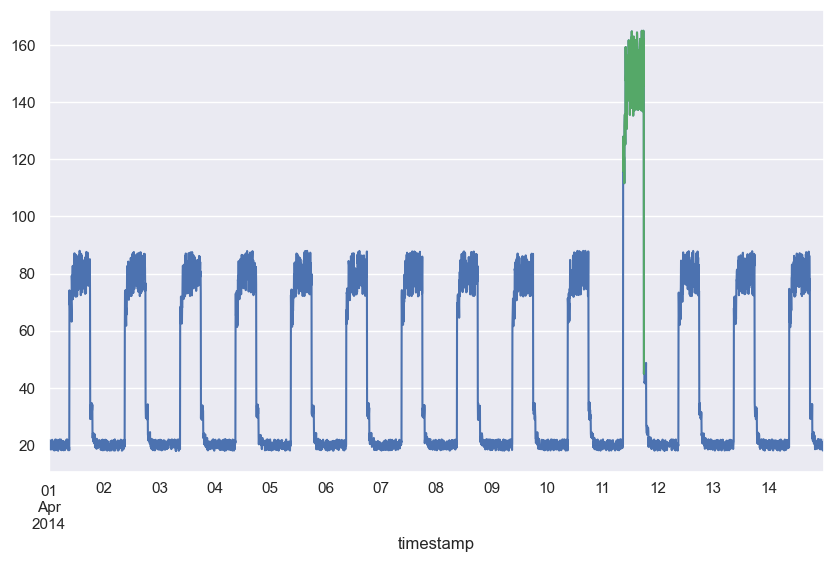

In [81]:
# lets plot the above
fig, ax = plt.subplots(figsize=(10, 6))

# no legend
df_daily_jumpsup.plot(legend=False, ax=ax)

# lets plot the anomalies over the above coloured 'red' for easy identification. no legend
df_subset.plot(legend=False, ax=ax, color="g");

<a name="ref"></a>
<h2>References</h2> 


1. https://www.infoworld.com/article/3278008/what-is-tensorflow-the-machine-learning-library-explained.html

2. https://d3lm.medium.com/understand-tensorflow-by-mimicking-its-api-from-scratch-faa55787170d

3. https://www.infoworld.com/article/3336192/what-is-keras-the-deep-neural-network-api-explained.html

4. https://www.activestate.com/resources/quick-reads/what-is-a-keras-model/#:~:text=Keras%20is%20a%20neural%20network,built%20for%20you%20by%20TensorFlow.

5. https://www.analyticsvidhya.com/blog/2022/04/predicting-house-prices-using-keras-functional-api/

6. N. Singh and C. Olinsky, "Demystifying Numenta anomaly benchmark," 2017 International Joint Conference on Neural Networks (IJCNN), 2017, pp. 1570-1577, doi: 10.1109/IJCNN.2017.7966038.

7. https://www.kaggle.com/datasets/boltzmannbrain/nab

8. Ahmad, S., Lavin, A., Purdy, S., & Agha, Z. (2017). Unsupervised real-time anomaly detection for streaming data. Neurocomputing, Available online 2 June 2017, ISSN 0925-2312, https://doi.org/10.1016/j.neucom.2017.04.070

9. https://curiousily.com/posts/anomaly-detection-in-time-series-with-lstms-using-keras-in-python/

10. https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e

11. https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

12. https://vatsalparsaniya.github.io/ML_Knowledge/Standardization_Normalization/README.html#:~:text=The%20procedure%20involves%20subtracting%20the,%CE%BC%3D0%20and%20%CF%83%3D1

13. https://keras.io/examples/timeseries/timeseries_anomaly_detection/

14. https://towardsdatascience.com/introduction-to-data-preprocessing-in-machine-learning-a9fa83a5dc9d

15. https://pub.towardsai.net/autoencoder-for-anomaly-detection-using-tensorflow-keras-7fdfa9f3ad99

16. https://www.databricks.com/glossary/convolutional-layer#:~:text=In%20deep%20learning%2C%20a%20convolutional,and%20various%20other%20purposes%20The

17. https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/

18. https://valueml.com/anomaly-detection-in-time-series-data-using-keras/

19. https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939

20. https://www.kaggle.com/code/dansbecker/rectified-linear-units-relu-in-deep-learning/notebook

21. https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

22. https://keras.io/api/layers/convolution_layers/convolution2d/

23. https://keras.io/api/layers/convolution_layers/convolution1d/

24. https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/

25. https://medium.com/@santi.pdp/how-pytorch-transposed-convs1d-work-a7adac63c4a5

26. https://keras.io/api/optimizers/

27. D. P. Kingma and J. Ba, "Adam: A method for stochastic optimization", 2014.

28. https://keras.io/api/optimizers/adam/

29. https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/

30. https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

31. https://builtin.com/machine-learning/common-loss-functions#:~:text=What%20Are%20Loss%20Functions%20in,of%20predicting%20the%20expected%20outcome.

32. 

***

## End